<a href="https://colab.research.google.com/github/VeronikaShe/ML-study_HW_1/blob/main/HW_4_Log_manual_nesterov_grad_rms_SHEMYAKINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Загружаем данные.

- Используем датасет с ирисами. Оставляем только 2 класса: Iris Versicolor, Iris Virginica.


In [3]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
!pip install category_encoders
from category_encoders.count import CountEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.9 MB/s eta 0:00:00


In [4]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [76]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [77]:
# датасет
X = iris.data[50:,:] # забираем данные из датасета
y = iris.target[50:]
X,y

(array([[7. , 3.2, 4.7, 1.4],
        [6.4, 3.2, 4.5, 1.5],
        [6.9, 3.1, 4.9, 1.5],
        [5.5, 2.3, 4. , 1.3],
        [6.5, 2.8, 4.6, 1.5],
        [5.7, 2.8, 4.5, 1.3],
        [6.3, 3.3, 4.7, 1.6],
        [4.9, 2.4, 3.3, 1. ],
        [6.6, 2.9, 4.6, 1.3],
        [5.2, 2.7, 3.9, 1.4],
        [5. , 2. , 3.5, 1. ],
        [5.9, 3. , 4.2, 1.5],
        [6. , 2.2, 4. , 1. ],
        [6.1, 2.9, 4.7, 1.4],
        [5.6, 2.9, 3.6, 1.3],
        [6.7, 3.1, 4.4, 1.4],
        [5.6, 3. , 4.5, 1.5],
        [5.8, 2.7, 4.1, 1. ],
        [6.2, 2.2, 4.5, 1.5],
        [5.6, 2.5, 3.9, 1.1],
        [5.9, 3.2, 4.8, 1.8],
        [6.1, 2.8, 4. , 1.3],
        [6.3, 2.5, 4.9, 1.5],
        [6.1, 2.8, 4.7, 1.2],
        [6.4, 2.9, 4.3, 1.3],
        [6.6, 3. , 4.4, 1.4],
        [6.8, 2.8, 4.8, 1.4],
        [6.7, 3. , 5. , 1.7],
        [6. , 2.9, 4.5, 1.5],
        [5.7, 2.6, 3.5, 1. ],
        [5.5, 2.4, 3.8, 1.1],
        [5.5, 2.4, 3.7, 1. ],
        [5.8, 2.7, 3.9, 1.2],
        [6

In [78]:
y = np.where(y == 1, 1, 0)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [79]:
X = np.c_[np.ones(len(X)), X]
X

array([[1. , 7. , 3.2, 4.7, 1.4],
       [1. , 6.4, 3.2, 4.5, 1.5],
       [1. , 6.9, 3.1, 4.9, 1.5],
       [1. , 5.5, 2.3, 4. , 1.3],
       [1. , 6.5, 2.8, 4.6, 1.5],
       [1. , 5.7, 2.8, 4.5, 1.3],
       [1. , 6.3, 3.3, 4.7, 1.6],
       [1. , 4.9, 2.4, 3.3, 1. ],
       [1. , 6.6, 2.9, 4.6, 1.3],
       [1. , 5.2, 2.7, 3.9, 1.4],
       [1. , 5. , 2. , 3.5, 1. ],
       [1. , 5.9, 3. , 4.2, 1.5],
       [1. , 6. , 2.2, 4. , 1. ],
       [1. , 6.1, 2.9, 4.7, 1.4],
       [1. , 5.6, 2.9, 3.6, 1.3],
       [1. , 6.7, 3.1, 4.4, 1.4],
       [1. , 5.6, 3. , 4.5, 1.5],
       [1. , 5.8, 2.7, 4.1, 1. ],
       [1. , 6.2, 2.2, 4.5, 1.5],
       [1. , 5.6, 2.5, 3.9, 1.1],
       [1. , 5.9, 3.2, 4.8, 1.8],
       [1. , 6.1, 2.8, 4. , 1.3],
       [1. , 6.3, 2.5, 4.9, 1.5],
       [1. , 6.1, 2.8, 4.7, 1.2],
       [1. , 6.4, 2.9, 4.3, 1.3],
       [1. , 6.6, 3. , 4.4, 1.4],
       [1. , 6.8, 2.8, 4.8, 1.4],
       [1. , 6.7, 3. , 5. , 1.7],
       [1. , 6. , 2.9, 4.5, 1.5],
       [1. , 5

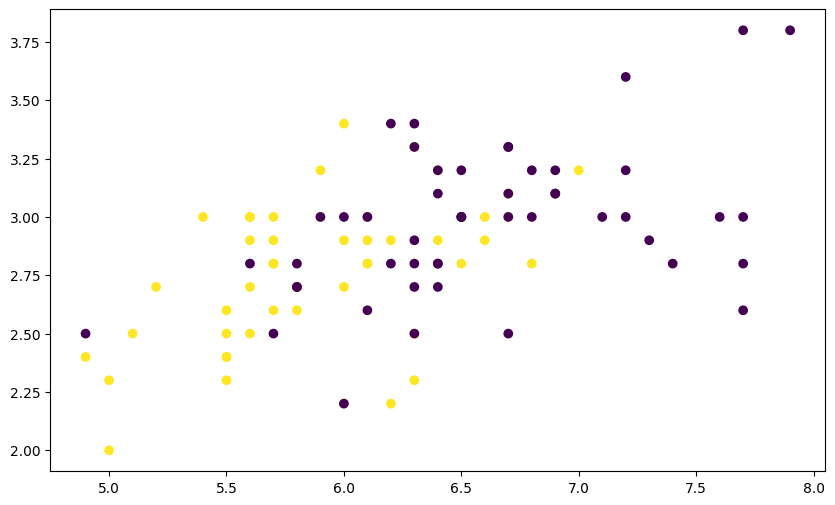

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], X[:, 2], c=y);

In [81]:
X = np.c_[np.ones(len(X)), X]

Масштабируем наши признаки

In [82]:
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  X

array([[ 0.        ,  0.        ,  1.11900931,  0.99068792, -0.25077906,
        -0.65303909],
       [ 0.        ,  0.        ,  0.20924564,  0.99068792, -0.49425387,
        -0.41643072],
       [ 0.        ,  0.        ,  0.96738203,  0.68864892, -0.00730424,
        -0.41643072],
       [ 0.        ,  0.        , -1.15539985, -1.72766308, -1.10294091,
        -0.88964745],
       [ 0.        ,  0.        ,  0.36087292, -0.21746808, -0.37251647,
        -0.41643072],
       [ 0.        ,  0.        , -0.8521453 , -0.21746808, -0.49425387,
        -0.88964745],
       [ 0.        ,  0.        ,  0.05761837,  1.29272692, -0.25077906,
        -0.17982236],
       [ 0.        ,  0.        , -2.06516352, -1.42562408, -1.95510276,
        -1.59947255],
       [ 0.        ,  0.        ,  0.5125002 ,  0.08457092, -0.37251647,
        -0.88964745],
       [ 0.        ,  0.        , -1.61028169, -0.51950708, -1.22467832,
        -0.65303909],
       [ 0.        ,  0.        , -1.91353624, -2.

Реализуем функцию:

logloss - функция логистической функции потерь (cross entropy)  logloss=−1n∑(yi⋅log(pi)+(1−yi)⋅log(1−pi))
gr_logloss - градиент функции logloss записанные в матричном виде.  XT(σ(XW)−Y)

In [84]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def logloss(y, y_proba):
    logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30))
    logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
    logloss_total = -(logloss_0 + logloss_1) / len(y)
    return logloss_total


def gr_logloss(X, W, y):
    y_proba = sigmoid(X @ W)
    grad = X.T @ (y_proba - y)
    return grad

# Обучим логистическую регрессию при помощи градиентного спуска.

In [148]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# первоначальное точка
#np.random.seed(2)
W = np.random.randn(X.shape[1])
W = np.where(W == 1, 1, 1)

# размер шага (learning rate)
learning_rate = 0.01

next_W = W

# количество итераций
n = 70
for i in range(n):
    cur_W = next_W

    # движение в негативную сторону вычисляемого градиента
    next_W = cur_W - learning_rate * gr_logloss(X, cur_W, y)

    # остановка когда достигнута необходимая степень точности
    if np.linalg.norm(cur_W - next_W) <= eps:
        break

    if i % 1 == 0:
        print(f"Итерация: {i}")
        y_proba = sigmoid(X @ next_W)
        y_class = np.where(y_proba >= 0.5, 1, 0)
        accuracy = (y_class == y).sum() / len(y)
        print(f"Logloss {logloss(y, y_proba)}")
        print(f"Accuracy {accuracy}")
        print("--------------------------------------------------------")

Итерация: 0
Logloss 1.2910308882282424
Accuracy 0.22
--------------------------------------------------------
Итерация: 1
Logloss 0.47971328600027185
Accuracy 0.95
--------------------------------------------------------
Итерация: 2
Logloss 0.33937215184892267
Accuracy 0.95
--------------------------------------------------------
Итерация: 3
Logloss 0.29230496367120734
Accuracy 0.96
--------------------------------------------------------
Итерация: 4
Logloss 0.26469821673069044
Accuracy 0.96
--------------------------------------------------------
Итерация: 5
Logloss 0.2452868216750972
Accuracy 0.96
--------------------------------------------------------
Итерация: 6
Logloss 0.23036939240585455
Accuracy 0.96
--------------------------------------------------------
Итерация: 7
Logloss 0.21829776410980814
Accuracy 0.95
--------------------------------------------------------
Итерация: 8
Logloss 0.20819857415842297
Accuracy 0.95
--------------------------------------------------------
Ите

Сравним с модеделью из коробки

In [60]:

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

model = LogisticRegression(max_iter=500)

In [61]:
y = pd.Series(data = np.ravel(y))
X,y

(array([[ 0.        ,  1.11900931,  0.99068792, -0.25077906, -0.65303909],
        [ 0.        ,  0.20924564,  0.99068792, -0.49425387, -0.41643072],
        [ 0.        ,  0.96738203,  0.68864892, -0.00730424, -0.41643072],
        [ 0.        , -1.15539985, -1.72766308, -1.10294091, -0.88964745],
        [ 0.        ,  0.36087292, -0.21746808, -0.37251647, -0.41643072],
        [ 0.        , -0.8521453 , -0.21746808, -0.49425387, -0.88964745],
        [ 0.        ,  0.05761837,  1.29272692, -0.25077906, -0.17982236],
        [ 0.        , -2.06516352, -1.42562408, -1.95510276, -1.59947255],
        [ 0.        ,  0.5125002 ,  0.08457092, -0.37251647, -0.88964745],
        [ 0.        , -1.61028169, -0.51950708, -1.22467832, -0.65303909],
        [ 0.        , -1.91353624, -2.63378009, -1.71162795, -1.59947255],
        [ 0.        , -0.54889074,  0.38660992, -0.8594661 , -0.41643072],
        [ 0.        , -0.39726347, -2.02970209, -1.10294091, -1.59947255],
        [ 0.        , -0.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)


LogisticRegression(max_iter=500)

In [64]:
predictions0 = model.predict(X_test)

In [65]:
predictions = model.predict_proba(X_test)

<p>Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.</p>

In [66]:
model.score(X_train, y_train)

0.9875

In [67]:
model.score(X_test, y_test)

0.85

Считаем accuracy последней модели

In [89]:
from sklearn.metrics import recall_score, precision_score, accuracy_score


In [90]:
pred = model.predict(X_test)

In [92]:
accuracy_score(y_test, pred)

0.85

## Обучим логистическую регрессию при помощи ускоренного по Нестерову метода адаптивной оценки моментов (Nesterov–accelerated Adaptive Moment Estimation, Nadam)

In [106]:
# Nesterov

g = 0.95

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def logloss(y, y_proba):
    logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30))
    logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
    logloss_total = -(logloss_0 + logloss_1) / len(y)
    return logloss_total


def gr_logloss(X, W, y):
    y_proba = sigmoid(X @ W)
    grad = X.T @ (y_proba - y)
    return grad

In [139]:
# Nesterov
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# первоначальня точка
#np.random.seed(2)
W = np.random.randn(X.shape[1])
W = np.where(W == 1, 1, 1)
cur_imp = np.where(W == 1, 0, 0)

# размер шага (learning rate)
learning_rate = 0.01

next_W = W

# количество итераций
n = 100
for i in range(n):
    cur_W = next_W

    # движение в негативную сторону вычисляемого градиента
    # next_W = cur_W - learning_rate * gr_logloss(X, cur_W, y)
    next_imp = g * cur_imp + learning_rate * gr_logloss(X, cur_W - g * cur_imp, y)
    next_W = cur_W - next_imp

    # остановка когда достигнута необходимая степень точности
    if np.linalg.norm(cur_W - next_W) <= eps:
        break

    if i % 1 == 0:
        print(f"Итерация: {i}")
        y_proba = sigmoid(X @ next_W)
        y_class = np.where(y_proba >= 0.5, 1, 0)
        accuracy = (y_class == y).sum() / len(y)
        print(f"Logloss {logloss(y, y_proba)}")
        print(f"Accuracy {accuracy}")
        print("--------------------------------------------------------")

Итерация: 0
Logloss 1.2910308882282424
Accuracy 0.22
--------------------------------------------------------
Итерация: 1
Logloss 0.47971328600027185
Accuracy 0.95
--------------------------------------------------------
Итерация: 2
Logloss 0.33937215184892267
Accuracy 0.95
--------------------------------------------------------
Итерация: 3
Logloss 0.29230496367120734
Accuracy 0.96
--------------------------------------------------------
Итерация: 4
Logloss 0.26469821673069044
Accuracy 0.96
--------------------------------------------------------
Итерация: 5
Logloss 0.2452868216750972
Accuracy 0.96
--------------------------------------------------------
Итерация: 6
Logloss 0.23036939240585455
Accuracy 0.96
--------------------------------------------------------
Итерация: 7
Logloss 0.21829776410980814
Accuracy 0.95
--------------------------------------------------------
Итерация: 8
Logloss 0.20819857415842297
Accuracy 0.95
--------------------------------------------------------
Ите

## Обучим логистическую регрессию при помощи метода скользящего среднего (Root Mean Square Propagation, RMSProp)

In [138]:
# RMSProp
# установка минимального значения, на которое должны изменяться веса
a=0.1

eps = 0.0001

# первоначальня точка
#np.random.seed(2)
W = np.random.randn(X.shape[1])
W = np.where(W == 1, 1, 1)
cur_g = np.where(W == 1, 0, 0)

# размер шага (learning rate)
learning_rate = 0.01

next_W = W

# количество итераций
n = 60
for i in range(n):
    cur_W = next_W

    # движение в негативную сторону вычисляемого градиента
    # next_W = cur_W - learning_rate * gr_logloss(X, cur_W, y)
    next_g = a * cur_g + (1-a) * np.square(gr_logloss(X, cur_W, y))
    next_W = cur_W - learning_rate * gr_logloss(X, cur_W, y) / (np.sqrt(g)+eps)

    # остановка когда достигнута необходимая степень точности
    if np.linalg.norm(cur_W - next_W) <= eps:
        break

    if i % 1 == 0:
        print(f"Итерация: {i}")
        y_proba = sigmoid(X @ next_W)
        y_class = np.where(y_proba >= 0.5, 1, 0)
        accuracy = (y_class == y).sum() / len(y)
        print(f"Logloss {logloss(y, y_proba)}")
        print(f"Accuracy {accuracy}")
        print("--------------------------------------------------------")

Итерация: 0
Logloss 1.2571654377555885
Accuracy 0.23
--------------------------------------------------------
Итерация: 1
Logloss 0.45981543886056625
Accuracy 0.93
--------------------------------------------------------
Итерация: 2
Logloss 0.3327757478879411
Accuracy 0.95
--------------------------------------------------------
Итерация: 3
Logloss 0.28797760415365664
Accuracy 0.96
--------------------------------------------------------
Итерация: 4
Logloss 0.2612509675826993
Accuracy 0.96
--------------------------------------------------------
Итерация: 5
Logloss 0.2422988106219374
Accuracy 0.96
--------------------------------------------------------
Итерация: 6
Logloss 0.22766424656059267
Accuracy 0.96
--------------------------------------------------------
Итерация: 7
Logloss 0.2157875587634864
Accuracy 0.95
--------------------------------------------------------
Итерация: 8
Logloss 0.20583422255937756
Accuracy 0.95
--------------------------------------------------------
Итерац

Вывод

Модель градиентного спуска и Метод Нестерова показали одинаковую точность и скорость, Метод скользящего среднего достиг такой же точности за меньшее количество итераций.


|Метод градиентного спуска|

- Итерация: 56

- Logloss 0.10208450197238

- Accuracy 0.98


|Метод Нестерова|

- Итерация: 56

- Logloss 0.10208450197238

- Accuracy 0.98



|Метод скользящего среднего|

- Итерация: 54

- Logloss 0.10240406213427455

- Accuracy 0.98


